# Homework 3: Prediction and Classification

Due: Thursday, October 16, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW3.ipynb download=HW3.ipynb> Download this assignment</a>

#### Submission Instructions
To submit your homework, create a folder named lastname_firstinitial_hw# and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. If we cannot access your work because these directions are not followed correctly, we will not grade your work.

---


# Introduction

In this assignment you will be using regression and classification to explore different data sets.  

**First**: You will use data from before 2002 in the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) to create a metric for picking baseball players using linear regression. This is same database we used in Homework 1. This database contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more". [Documentation provided here](http://seanlahman.com/files/database/readme2012.txt).

!["Sabermetrics Science"](http://saberseminar.com/wp-content/uploads/2012/01/saber-web.jpg)
http://saberseminar.com/wp-content/uploads/2012/01/saber-web.jpg

**Second**: You will use the famous [iris](http://en.wikipedia.org/wiki/Iris_flower_data_set) data set to perform a $k$-neareast neighbor classification using cross validation.  While it was introduced in 1936, it is still [one of the most popular](http://archive.ics.uci.edu/ml/) example data sets in the machine learning community. Wikipedia describes the data set as follows: "The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres." Here is an illustration what the four features measure:

!["iris data features"](http://sebastianraschka.com/Images/2014_python_lda/iris_petal_sepal.png)
http://sebastianraschka.com/Images/2014_python_lda/iris_petal_sepal.png

**Third**: You will investigate the influence of higher dimensional spaces on the classification using another standard data set in machine learning called the The [digits data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).  This data set is similar to the MNIST data set discussed in the lecture. The main difference is, that each digit is represented by an 8x8 pixel image patch, which is considerably smaller than the 28x28 pixels from MNIST. In addition, the gray values are restricted to 16 different values (4 bit), instead of 256 (8 bit) for MNIST. 

**Finally**: In preparation for Homework 4, we want you to read through the following articles related to predicting the 2014 Senate Midterm Elections. 

* [Nate Silver's Methodology at while at NYT](http://fivethirtyeight.blogs.nytimes.com/methodology/)
* [How The FiveThirtyEight Senate Forecast Model Works](http://fivethirtyeight.com/features/how-the-fivethirtyeight-senate-forecast-model-works/)
* [Pollster Ratings v4.0: Methodology](http://fivethirtyeight.com/features/pollster-ratings-v40-methodology/)
* [Pollster Ratings v4.0: Results](http://fivethirtyeight.com/features/pollster-ratings-v40-results/)
* [Nate Silver versus Sam Wang](http://www.washingtonpost.com/blogs/plum-line/wp/2014/09/17/nate-silver-versus-sam-wang/)
* [More Nate Silver versus Sam Wang](http://www.dailykos.com/story/2014/09/09/1328288/-Get-Ready-To-Rumbllllle-Battle-Of-The-Nerds-Nate-Silver-VS-Sam-Wang)
* [Nate Silver explains critisims of Sam Wang](http://politicalwire.com/archives/2014/10/02/nate_silver_rebuts_sam_wang.html)
* [Background on the feud between Nate Silver and Sam Wang](http://talkingpointsmemo.com/dc/nate-silver-sam-wang-feud)
* [Are there swing voters?]( http://www.stat.columbia.edu/~gelman/research/unpublished/swing_voters.pdf)



---

## Load Python modules

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 

# If this module is not already installed, you may need to install it. 
# You can do this by typing 'pip install seaborn' in the command line
import seaborn as sns 

import sklearn
import sklearn.datasets
import sklearn.cross_validation
import sklearn.decomposition
import sklearn.grid_search
import sklearn.neighbors
import sklearn.metrics

# Problem 1: Sabermetrics

Using data preceding the 2002 season pick 10 offensive players keeping the payroll under $20 million (assign each player the median salary). Predict how many games this team would win in a 162 game season.  

In this problem we will be returning to the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) that we used in Homework 1.  From this database, we will be extract five data sets containing information such as yearly stats and standing, batting statistics, fielding statistics, player names, player salaries and biographical information. You will explore the data in this database from before 2002 and create a metric for picking players. 

#### Problem 1(a) 

Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Teams.csv', 'Batting.csv', 'Salaries.csv', 'Fielding.csv', 'Master.csv' tables. Read these tables into separate pandas DataFrames with the following names. 

CSV file name | Name of pandas DataFrame
:---: | :---: 
Teams.csv | teams
Batting.csv | players
Salaries.csv | salaries
Fielding.csv | fielding
Master.csv | master

In [2]:
### Your code here ###

def getZIP(zipFileName):
    r = requests.get(zipFileName).content
    s = StringIO.StringIO(r)
    zf = zipfile.ZipFile(s, 'r') # Read in a list of zipped files
    return zf

url = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'
zf = getZIP(url)
tablenames = zf.namelist()
print tablenames

['SchoolsPlayers.csv', 'SeriesPost.csv', 'Teams.csv', 'TeamsFranchises.csv', 'TeamsHalf.csv', 'AllstarFull.csv', 'Appearances.csv', 'AwardsManagers.csv', 'AwardsPlayers.csv', 'AwardsShareManagers.csv', 'AwardsSharePlayers.csv', 'Batting.csv', 'BattingPost.csv', 'Fielding.csv', 'FieldingOF.csv', 'FieldingPost.csv', 'HallOfFame.csv', 'Managers.csv', 'ManagersHalf.csv', 'Master.csv', 'Pitching.csv', 'PitchingPost.csv', 'readme2013.txt', 'Salaries.csv', 'Schools.csv']


Create pandas DataFrames for each of the five data sets. 

In [3]:
teams = pd.read_csv(zf.open(tablenames[tablenames.index('Teams.csv')]))
players = pd.read_csv(zf.open(tablenames[tablenames.index('Batting.csv')]))
salaries = pd.read_csv(zf.open(tablenames[tablenames.index('Salaries.csv')]))
fielding = pd.read_csv(zf.open(tablenames[tablenames.index('Fielding.csv')]))
master = pd.read_csv(zf.open(tablenames[tablenames.index('Master.csv')]))

We can print the dimensions (i.e. number of rows and columns) for each of the DataFrames.  

In [4]:
### Your code here ###
print "Dimensions of teams DataFrame:", teams.shape
print "Dimensions of players DataFrame:", players.shape
print "Dimensions of salaries DataFrame:", salaries.shape
print "Dimensions of fielding DataFrame:", fielding.shape
print "Dimensions of master DataFrame:", master.shape

Dimensions of teams DataFrame: (2745, 48)
Dimensions of players DataFrame: (97889, 24)
Dimensions of salaries DataFrame: (23956, 5)
Dimensions of fielding DataFrame: (166991, 18)
Dimensions of master DataFrame: (18354, 24)


#### Problem 1(b)

Calculate the median salary for each player and create a pandas DataFrame called `medianSalaries` with four columns: (1) the player ID, (2) the first name of the player, (3) the last name of the player and (4) the median salary of the player. Show the head of the `medianSalaries` DataFrame.   


In [5]:
### Your code here ###
byPlayerID = salaries.groupby('playerID')['playerID','salary'].median()
medianSalaries = pd.merge(master[['playerID', 'nameFirst', 'nameLast']], byPlayerID, \
                  left_on='playerID', right_index = True, how="inner")
medianSalaries.head()

,playerID,nameFirst,nameLast,salary
0,aardsda01,David,Aardsma,419000
3,aasedo01,Don,Aase,612500
4,abadan01,Andy,Abad,327000
5,abadfe01,Fernando,Abad,451500
13,abbotje01,Jeff,Abbott,255000


#### Problem 1(c)

Now, consider only team/season combinations in which the teams played 162 Games. Exclude all data from before 1947. Compute the per plate appearance rates for singles, doubles, triples, HR, and BB. Create a new pandas DataFrame called `stats` that has the teamID, yearID, wins and these rates.

**Hint**: Singles are hits that are not doubles, triples, nor HR. Plate appearances are base on balls plus at bats.



In [6]:
### Your code here ###
subTeams = teams[(teams['G'] == 162) & (teams['yearID'] > 1947)].copy()

subTeams["1B"] = subTeams.H - subTeams["2B"] - subTeams["3B"] - subTeams["HR"]
subTeams["PA"] = subTeams.BB + subTeams.AB

for col in ["1B","2B","3B","HR","BB"]:
    subTeams[col] = subTeams[col]/subTeams.PA
    
stats = subTeams[["teamID","yearID","W","1B","2B","3B","HR","BB"]].copy()
stats.head()

,teamID,yearID,W,1B,2B,3B,HR,BB
1366,LAA,1961,70,0.147748,0.035708,0.003604,0.030958,0.111548
1367,KC1,1961,61,0.164751,0.035982,0.007829,0.014993,0.096618
1377,NYA,1962,96,0.167148,0.038536,0.004656,0.031952,0.093770
1379,LAA,1962,86,0.159482,0.038027,0.005737,0.022455,0.098672
1381,CHA,1962,85,0.165797,0.040756,0.009129,0.014998,0.101076


#### Problem 1(d)

Is there a noticeable time trend in the rates computed computed in Problem 1(c)? 

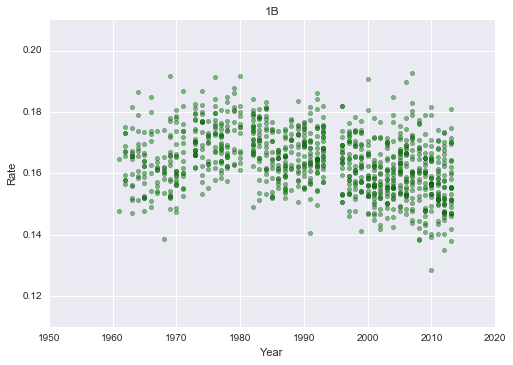

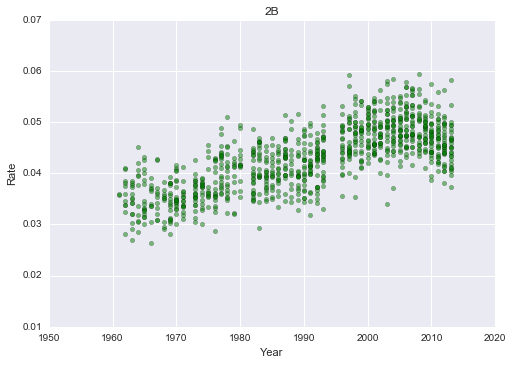

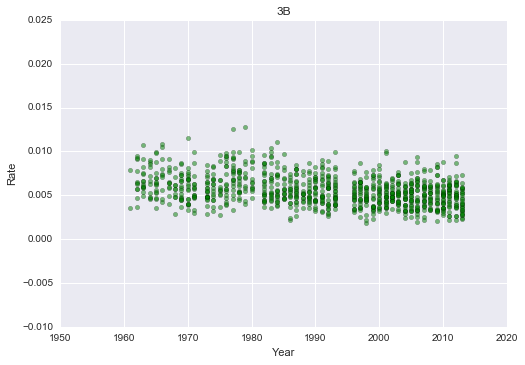

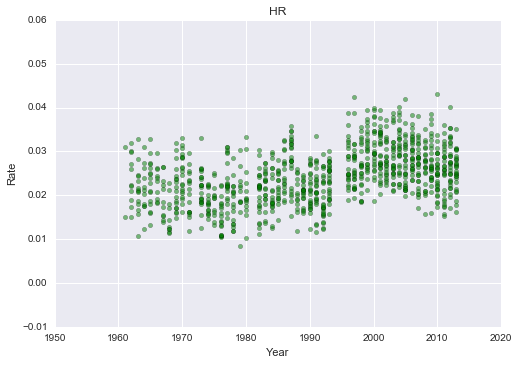

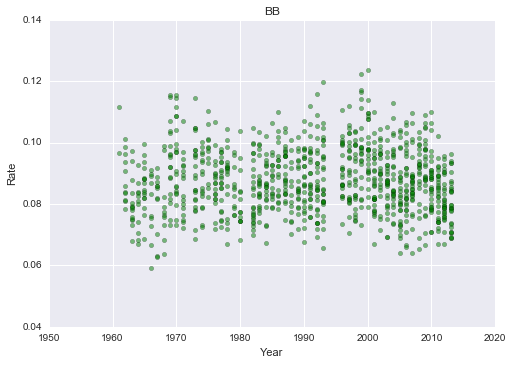

In [7]:
### Your code here ###
for col in ["1B","2B","3B","HR","BB"]:
    plt.scatter(stats.yearID, stats[col], c="g", alpha=0.5)
    plt.title(col)
    plt.xlabel('Year')
    plt.ylabel('Rate')
    plt.show()

#### Problem 1(e) 

Using the `stats` DataFrame from Problem 1(c), adjust the singles per PA rates so that the average across teams for each year is 0. Do the same for the doubles, triples, HR, and BB rates. 

In [8]:
### Your code here ###

First let's check what the mean is across teams for each year for each of the rates. 

In [9]:
stats.groupby('yearID')["1B","2B","3B","HR","BB"].mean().head()

,1B,2B,3B,HR,BB
yearID,,,,,
1961,0.156249,0.035845,0.005717,0.022975,0.104083
1962,0.165632,0.035853,0.006777,0.023811,0.088590
1963,0.162467,0.034020,0.006896,0.021254,0.080336
1964,0.167251,0.036336,0.006748,0.021548,0.079152
1965,0.160042,0.035539,0.006534,0.022693,0.085745


Now we define a function to mean normalize the rates. 

In [10]:
def meanNormalizeRates(df):
        subRates = df[["1B","2B","3B","HR","BB"]]
        df[["1B","2B","3B","HR","BB"]] = subRates - subRates.mean(axis=0)
        return df

stats = stats.groupby('yearID').apply(meanNormalizeRates)

#### Problem 1(f)

Build a simple linear regression model to predict the number of wins from the average adjusted singles, double, triples, HR, and BB rates. To decide which of these terms to include fit the model to data from 2002 and compute the average squared residuals from predictions to years past 2002. Use the fitted model to define a new sabermetric summary: offensive predicted wins (OPW). 

**Hint**: the new summary should be a linear combination of one to five of the five rates.

In [11]:
### Your code here ###
from sklearn import linear_model
clf = linear_model.LinearRegression()

stat_train = stats[stats.yearID < 2002]
stat_test = stats[stats.yearID >= 2002]

XX_train = stat_train[["1B","2B","3B","HR","BB"]].values
XX_test = stat_test[["1B","2B","3B","HR","BB"]].values

YY_train = stat_train.W.values
YY_test = stat_test.W.values
clf.fit(XX_train,YY_train)
clf.coef_

print("Mean squared error: %.2f"
      % np.mean((YY_test - clf.predict(XX_test)) ** 2))

Mean squared error: 83.82


** Your answer here: ** From model above, we are defining a new sabermetric summary (OPW) which is a linear combination of all the five rates as that is the one with the smallest mean squared error

#### Problem 1(g)

Now we will create a similar database for individual players. Consider only player/year combinations in which the player had at least 500 plate appearances. Consider only the years we considered for the calculations above (after 1947 and seasons with 162 games). For each player/year compute singles, doubles, triples, HR, BB per plate appearance rates. Create a new pandas DataFrame called `playerstats` that has the playerID, yearID and the rates of these stats.  Remove the average for each year as for these rates as done in Problem 1(e). 

In [12]:
### Your code here ###

First we will subset the `players` DataFrame for players with at least 500 plate appearances and for years after 1947.  **Note**, we did not specifically say to also subset for 162 games as well, but just referenced above). Adding this will dramatically reduce the number of players.  

In [13]:
subPlayers = players[(players.AB + players.BB > 500)  & (players.yearID > 1947)].copy()

subPlayers["1B"] = subPlayers.H - subPlayers["2B"] - subPlayers["3B"] - subPlayers["HR"]
subPlayers["PA"] = subPlayers.BB + subPlayers.AB

for col in ["1B","2B","3B","HR","BB"]:
    subPlayers[col] = subPlayers[col]/subPlayers.PA

# Create playerstats DataFrame
playerstats = subPlayers[["playerID","yearID","1B","2B","3B","HR","BB"]].copy()

Use same function defined in Problem 1(e) to mean normalize across teams for each year

In [14]:
playerstats = playerstats.groupby('yearID').apply(meanNormalizeRates) 

Show the head of the `playerstats` DataFrame. 

In [15]:
### Your code here ###
playerstats.head()

,playerID,yearID,1B,2B,3B,HR,BB
8,aaronha01,1955,0.001060,0.018570,0.005585,0.011337,-0.027249
9,aaronha01,1956,0.021561,0.013857,0.012480,0.009593,-0.044600
10,aaronha01,1957,0.004817,-0.002034,0.000466,0.037093,-0.013166
11,aaronha01,1958,0.018367,0.011015,-0.002219,0.015398,-0.007762
12,aaronha01,1959,0.016261,0.025762,0.002743,0.028368,-0.022898


#### Problem 1(h)

Using the `playerstats` DataFrame created in Problem 1(g), create a new DataFrame called `playerLS` containing the player's lifetime stats. This DataFrame should contain the `playerID`, the year the player's career started, the year the player's career ended and the player's lifetime average for each of the quantities (singles, doubles, triples, HR, BB). For simplicity we will simply compute the average of the rates by year (a more correct way is to go back to the totals). 

In [16]:
### Your code here ###

First we will create a function called `meanNormalizePlayerLS` that computes the lifetime average for each of the quantities (singles, doubles, triples, HR, BB). Then we will construct a function called `getyear` that extracts the year from a date as saved in the `master` table.

In [17]:
def meanNormalizePlayerLS(df):
    df = df[['playerID', '1B','2B','3B','HR','BB']].mean()
    return df

def getyear(x):
    return int(x[0:4])

Next, we use `groupby` (by `playerID`) on the `playerstats` DataFrame to compute the average lifetime statistics (1B, 2B, 3B, HR and BB) for each player.  

In [18]:
playerLS = playerstats.groupby('playerID').apply(meanNormalizePlayerLS).reset_index()

Then, we merge `playerLS` with the `master` DataFrame which contains the career start and end. 

In [19]:
playerLS = master[["playerID","debut","finalGame"]].merge(playerLS, how='inner', on="playerID")
playerLS.head()

,playerID,debut,finalGame,1B,2B,3B,HR,BB
0,aaronha01,1954-04-13,1976-10-03,-0.007157,0.006539,-0.000270,0.027850,0.009447
1,abramca01,1949-04-20,1956-05-09,0.013463,-0.023915,0.002384,0.003842,0.019455
2,abreubo01,1996-09-01,2012-10-02,-0.008202,0.006421,0.001002,-0.003252,0.050501
3,ackledu01,2011-06-17,2013-09-29,-0.009270,-0.016605,-0.001974,-0.015274,0.001597
4,adairje01,1958-09-02,1970-05-03,0.011933,0.003286,-0.002139,-0.012934,-0.037229


Finally, we extract the year from the `debut` and `finalGame` column to determine what year each player started and ended their career. 

In [20]:
playerLS["debut"] = playerLS.debut.apply(getyear)
playerLS["finalGame"] = playerLS.finalGame.apply(getyear)
cols = list(playerLS.columns)
cols[1:3]=["minYear","maxYear"]
playerLS.columns = cols

Show the head of the `playerLS` DataFrame. 

In [21]:
playerLS.head()

,playerID,minYear,maxYear,1B,2B,3B,HR,BB
0,aaronha01,1954,1976,-0.007157,0.006539,-0.000270,0.027850,0.009447
1,abramca01,1949,1956,0.013463,-0.023915,0.002384,0.003842,0.019455
2,abreubo01,1996,2012,-0.008202,0.006421,0.001002,-0.003252,0.050501
3,ackledu01,2011,2013,-0.009270,-0.016605,-0.001974,-0.015274,0.001597
4,adairje01,1958,1970,0.011933,0.003286,-0.002139,-0.012934,-0.037229


#### Problem 1(i)

Compute the OPW for each player based on the average rates in the `playerLS` DataFrame. You can interpret this summary statistic as the predicted wins for a team with 9 batters exactly like the player in question. Add this column to the playerLS DataFrame. Call this colum OPW.

In [22]:
### Your code here ###
avgRates = playerLS[["1B","2B","3B","HR","BB"]].values
playerLS["OPW"] = clf.predict(avgRates)
playerLS.head()

,playerID,minYear,maxYear,1B,2B,3B,HR,BB,OPW
0,aaronha01,1954,1976,-0.007157,0.006539,-0.000270,0.027850,0.009447,108.696139
1,abramca01,1949,1956,0.013463,-0.023915,0.002384,0.003842,0.019455,92.575472
2,abreubo01,1996,2012,-0.008202,0.006421,0.001002,-0.003252,0.050501,104.050008
3,ackledu01,2011,2013,-0.009270,-0.016605,-0.001974,-0.015274,0.001597,53.806003
4,adairje01,1958,1970,0.011933,0.003286,-0.002139,-0.012934,-0.037229,56.395050


#### Problem 1(j)

Add four columns to the `playerLS` DataFrame that contains the player's position (C, 1B, 2B, 3B, SS, LF, CF, RF, or OF), first name, last name and median salary. 

In [23]:
### Your code here ###
from collections import defaultdict

def find_pos(df):
    positions = df.POS
    d = defaultdict(int)
    for pos in positions:
        d[pos] += 1
    result = max(d.iteritems(), key=lambda x: x[1])
    return result[0]

positions_df = fielding.groupby("playerID").apply(find_pos)
positions_df = positions_df.reset_index()
positions_df = positions_df.rename(columns={0:"POS"})

In [24]:
playerLS_merged = positions_df.merge(playerLS, how='inner', on="playerID")
playerLS_merged = playerLS_merged.merge(medianSalaries, how='inner', on=['playerID'])

Show the head of the `playerLS` DataFrame. 

In [25]:
### Your code here ###
playerLS_merged.head()

,playerID,POS,minYear,maxYear,1B,2B,3B,HR,BB,OPW,nameFirst,nameLast,salary
0,abreubo01,RF,1996,2012,-0.008202,0.006421,0.001002,-0.003252,0.050501,104.050008,Bobby,Abreu,9000000
1,ackledu01,1B,2011,2013,-0.009270,-0.016605,-0.001974,-0.015274,0.001597,53.806003,Dustin,Ackley,2400000
2,adamsru01,SS,2004,2009,-0.007867,-0.001289,0.004160,-0.017533,0.002672,67.496507,Russ,Adams,329500
3,alfoned01,2B,1995,2006,0.013485,-0.002177,-0.003239,-0.006436,0.010745,83.404437,Edgardo,Alfonzo,4112500
4,alicelu01,2B,1988,2002,0.035625,-0.009597,0.007988,-0.026156,-0.006580,78.561778,Luis,Alicea,750000


#### Problem 1(k)

Subset the `playerLS` DataFrame for players active in 2002 and 2003 and played at least three years. Plot and describe the relationship bewteen the median salary (in millions) and the predicted number of wins. 

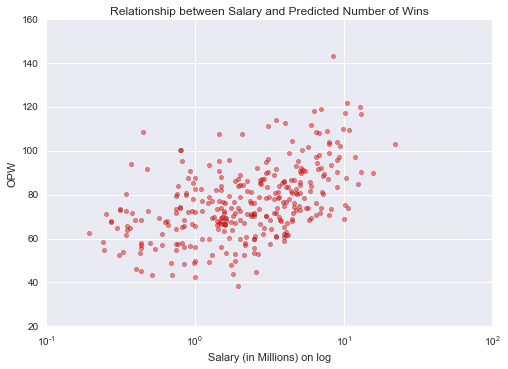

In [26]:
### Your code here ###
active = playerLS_merged[(playerLS_merged["minYear"] <= 2002) & \
                         (playerLS_merged["maxYear"] >= 2003) & \
                         (playerLS_merged["maxYear"] - playerLS_merged["minYear"] >= 3)  ]
fig = plt.figure()
ax = fig.gca()
ax.scatter(active.salary/10**6, active.OPW, alpha=0.5, c='red')
ax.set_xscale('log')
ax.set_xlabel('Salary (in Millions) on log')
ax.set_ylabel('OPW')
ax.set_title('Relationship between Salary and Predicted Number of Wins')
plt.show()

Note some players stand out as underpaid: points higher than the line.

#### Problem 1(l)
Pick one players from one of each of these 10 position C, 1B, 2B, 3B, SS, LF, CF, RF, or OF keeping the total median salary of all 10 players below 20 million. Report their averaged predicted wins and total salary.

There are many ways to do this. This is just one example that can still be optimized.  The basic idea is to iterate 10 times through an algorithm that selects players. In each iteration we pick a different position. We keep track of the bare minimum we would need to complete a team and keep at least that amount during each iteration. At each iteration we pick the player we can afford having the highest deviation from expected OPW given their salary. 

In [27]:
### Your code here ###

First, we mean normalize the `OPW` by position to compute a position specific residual using the `meanNormalizeOPW` function. 

In [28]:
def meanNormalizeOPW(df):
    tmp = df[['resid']] 
    df[['resid']]=tmp-tmp.median(axis=0)
    return df

active['resid']=active['OPW']
active = active.groupby('POS').apply(meanNormalizeOPW)

/Users/tomasz.dobrzycki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Next, we fit a linear regression model and calculate the residuals.

In [29]:
Y = active.resid.values
X = np.log(active[["salary"]])

clf = linear_model.LinearRegression()
clf.fit(X,Y)

active['resid'] = Y - clf.predict(X)

We can take out the below average players. 

In [30]:
active = active[active.resid >= 0]

Next, calculate the min salary by position.  We will use thos to know what is the minimum amount of money we need to keep (and know how much we can spend). 

In [31]:
def getMinSalary(s):
    return s["salary"].min()

minSalaryByPos = active.groupby('POS').apply(getMinSalary)
minSalaryByPos.sort(ascending=False)

/Users/tomasz.dobrzycki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


These are the 10 positions:

In [32]:
posleft = list(minSalaryByPos.index)
print posleft

['RF', 'CF', 'DH', '3B', '1B', 'C', 'OF', 'SS', '2B', 'LF']


The total money we have to spend is 20 million:

In [33]:
moneyleft = 20*10**6

Now, we will iterate through all the positions.  We keep track of the bare minimum we would need to complete a team and keep at least that amount during each iteration. At each iteration we pick the player we can afford having the highest deviation from expected OPW given their salary. 

In [34]:
# indexes will contain the indexes of the players we chose
indexes=[]
    
for i in range(len(posleft)):
    
    # you need to have at least this much left to not go over in the next picks
    maxmoney = moneyleft - sum([minSalaryByPos[x] for x in posleft[:-1] ])
    
    # consider only players in positions we have not selected
    index = [True if elem in posleft else False for elem in active.POS.values]
    left = active[index & (active.salary <= maxmoney)]
    
    # pick the one that stands out the most from what is expected given his salary
    j = left["resid"].argmax()
    indexes.append(j)
    
    # remove position we just filled from posleft
    posleft.remove(left.loc[j].POS)
    moneyleft = moneyleft - left.loc[j].salary
   
topPicks=active.loc[indexes,:]
topPicks=topPicks.sort(["OPW"],ascending=False)

/Users/tomasz.dobrzycki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


The total salary is 19.7 million. 

In [35]:
topPicks['salary'].sum()

19746417

We expect 100 wins.

In [36]:
round(topPicks['OPW'].mean())

100.0

#### Problem 1(m)

What do these players outperform in? Singles, doubles, triples HR or BB?

In [37]:
### Your code here ###
def round1000(x):
    return np.round(x*1000)

topPicks[["1B","2B","3B", "HR","BB"]] = topPicks[["1B","2B","3B", "HR","BB"]].apply(round1000)
topPicks[["OPW"]] = np.round(topPicks[["OPW"]])
topPicks[["nameFirst","nameLast","POS","1B","2B","3B", "HR","BB","OPW","salary","minYear","maxYear"]]

,nameFirst,nameLast,POS,1B,2B,3B,HR,BB,OPW,salary,minYear,maxYear
81,Barry,Bonds,OF,-45,1,1,31,112,143,8541667,1986,2007
582,Edgar,Martinez,DH,1,12,-4,5,53,114,3500000,1987,2004
274,Morgan,Ensberg,3B,-33,-3,-0,26,48,109,450000,2000,2008
475,Nick,Johnson,1B,-30,18,-3,-0,72,108,1450000,2001,2012
236,David,Dellucci,LF,-51,-19,5,24,57,100,812500,1997,2009
922,Jayson,Werth,RF,-15,-1,-4,12,33,96,1700000,2002,2013
55,Mark,Bellhorn,2B,-39,2,1,5,47,92,477500,1997,2007
872,Andres,Torres,CF,-39,25,9,-3,6,84,1500000,2002,2013
966,Gregg,Zaun,C,-8,-17,-3,-11,52,83,1000000,1995,2010
611,Frank,Menechino,SS,-22,-11,-2,-14,46,74,314750,1999,2005


** Your answer here: ** Our best players all outperformed in BB.

## Discussion for Problem 1


*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

In this problem, we used linear regression to build a tool to pick 10 offensive players with a salary under $20 million and could predict how many games this team would win in a season in Problem 1(l). 

# Problem 2:  $k$-Nearest Neighbors and Cross Validation 

What is the optimal $k$ for predicting species using $k$-nearest neighbor classification 
on the four features provided by the iris dataset.

In this problem you will get to know the famous iris data set, and use cross validation to select the optimal $k$ for a $k$-nearest neighbor classification. This problem set makes heavy use of the [sklearn](http://scikit-learn.org/stable/) library. In addition to Pandas, it is one of the most useful libraries for data scientists! After completing this homework assignment you will know all the basics to get started with your own machine learning projects in sklearn. 

Future lectures will give further background information on different classifiers and their specific strengths and weaknesses, but when you have the basics for sklearn down, changing the classifier will boil down to exchanging one to two lines of code.

The data set is so popular, that sklearn provides an extra function to load it:

In [38]:
#load the iris data set
iris = sklearn.datasets.load_iris()

X = iris.data  
Y = iris.target

print X.shape, Y.shape

(150, 4) (150,)


#### Problem 2(a) 

Split the data into a train and a test set. Use a random selection of 33% of the samples as test data. Sklearn provides the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) function for this purpose. Print the dimensions of all the train and test data sets you have created. 

In [39]:
### Your code here ###

# put test data aside
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    X, Y, test_size=0.33, random_state=42)

print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(100, 4)
(50, 4)
(100,)
(50,)


#### Problem 2(b)

Examine the data further by looking at the projections to the first two principal components of the data. Use the [`TruncatedSVD`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) function for this purpose, and create a scatter plot. Use the colors on the scatter plot to represent the different classes in the target data. 

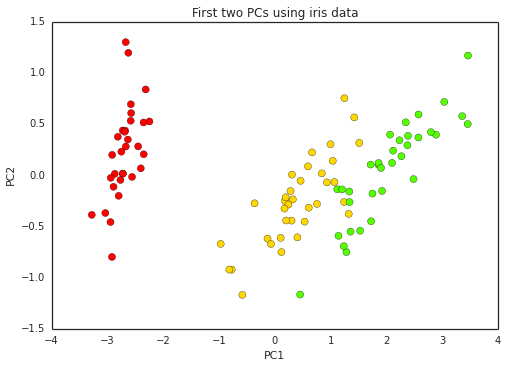

In [40]:
### Your code here ###

# make a scatter plot of the data in two dimensions
svd = sklearn.decomposition.TruncatedSVD(n_components=2)
X_train_centered = X_train - np.mean(X_train, axis=0)
X_2d = svd.fit_transform(X_train_centered)

sns.set_style('white')

plt.scatter(X_2d[:,0], X_2d[:,1], c=Y_train, s = 50, cmap=plt.cm.prism)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two PCs using iris data')
plt.show()

#### Problem 2(c) 

In the lecture we discussed how to use cross validation to estimate the optimal value for $k$ (the number of nearest neighbors to base the classification on). Use ***ten fold cross validation*** to estimate the optimal value for $k$ for the iris data set. 

**Note**: For your convenience sklearn does not only include the [KNN classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), but also a [grid search function](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV). The function is called grid search, because if you have to optimize more than one parameter, it is common practice to define a range of possible values for each parameter. An exhaustive search then runs over the complete grid defined by all the possible parameter combinations. This can get very computation heavy, but luckily our KNN classifier only requires tuning of a single parameter for this problem set. 

In [41]:
### Your code here ###

# use cross validation to find the optimal value for k
k = np.arange(20)+1

parameters = {'n_neighbors': k}
knn = sklearn.neighbors.KNeighborsClassifier()
clf = sklearn.grid_search.GridSearchCV(knn, parameters, cv=10)
clf.fit(X_train, Y_train)

# clf.grid_scores_

GridSearchCV(cv=10,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

#### Problem 2(d)

Visualize the result by plotting the score results versus values for $k$. 

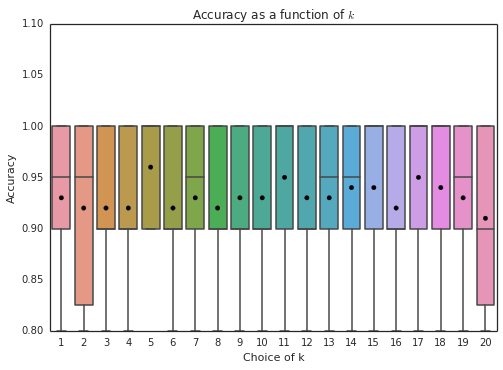

In [42]:
### Your code here ###
a = clf.grid_scores_
scores = [b.cv_validation_scores for b in a]

score_means = np.mean(scores, axis=1)

sns.boxplot(scores)
plt.scatter(k,score_means, c='k', zorder=2)
plt.ylim(0.8, 1.1)
plt.title('Accuracy as a function of $k$')
plt.ylabel('Accuracy')
plt.xlabel('Choice of k')
plt.show()

Verify that the grid search has indeed chosen the right parameter value for $k$.

In [43]:
### Your code here ###

clf.best_params_

{'n_neighbors': 5}

#### Problem 2(e)

Test the performance of our tuned KNN classifier on the test set.

In [44]:
def computeTestScores(test_x, test_y, clf, cv):
    kFolds = sklearn.cross_validation.KFold(test_x.shape[0], n_folds=cv)

    scores = []
    for _, test_index in kFolds:
        test_data = test_x[test_index]
        test_labels = test_y[test_index]
        scores.append(sklearn.metrics.accuracy_score(test_labels, clf.predict(test_data)))
    return scores

In [45]:
### Your code here ###
## no measurement without standard deviation
scores = computeTestScores(test_x = X_test, test_y = Y_test, clf=clf, cv=5)
print np.mean(scores), np.std(scores)

0.98 0.04


## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

Here we used $k$-Nearest Neighbors and cross validation to find the optimal $k$ to predict species. We found the optimal $k$ to be 5 which was visible in the scatter plot. The iris data set separates well and predictions are quite reliable, shown by the test accuracy of nearly one.

---



# Problem 3: The Curse and Blessing of Higher Dimensions

In this problem we will investigate the influence of higher dimensional spaces on the classification. The data set is again one of the standard data sets from sklearn. The [digits data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) is similar to the MNIST data set discussed in the lecture. The main difference is, that each digit is represented by an 8x8 pixel image patch, which is considerably smaller than the 28x28 pixels from MNIST. In addition, the gray values are restricted to 16 different values (4 bit), instead of 256 (8 bit) for MNIST. 

First we again load our data set.

In [46]:
digits = sklearn.datasets.load_digits()

X = digits.data  
Y = digits.target

print X.shape, Y.shape

(1797, 64) (1797,)


#### Problem 3(a) 

Start with the same steps as in Problem 2. Split the data into train and test set. Use 33% of the samples as test data. Print the dimensions of all the train and test data sets you created. 

In [47]:
### Your code here ###

X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    X, Y, test_size=0.33, random_state=42)

X_train_means = np.mean(X_train, axis=0)
X_train_centered = X_train - X_train_means
X_test_centered = X_test - X_train_means

print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(1203, 64)
(594, 64)
(1203,)
(594,)


#### Problem 3(b) 

Similar to Problem 2(b), create a scatter plot of the projections to the first two PCs.  Use the colors on the scatter plot to represent the different classes in the target data. How well can we separate the classes?

**Hint**: Use a `Colormap` in matplotlib to represent the diferent classes in the target data. 

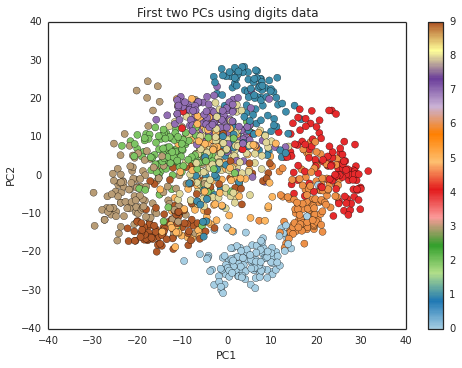

In [48]:
### Your code here ###

## make a scatter plot of the data in two dimensions
svd = sklearn.decomposition.TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X_train_centered)

plt.scatter(X_2d[:,0], X_2d[:,1], c=Y_train, s = 50, cmap=plt.cm.Paired)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two PCs using digits data')
plt.show()

Create individual scatter plots using only two classes at a time to explore which classes are most difficult to distinguish in terms of class separability.  You do not need to create scatter plots for all pairwise comparisons, but at least show one. 

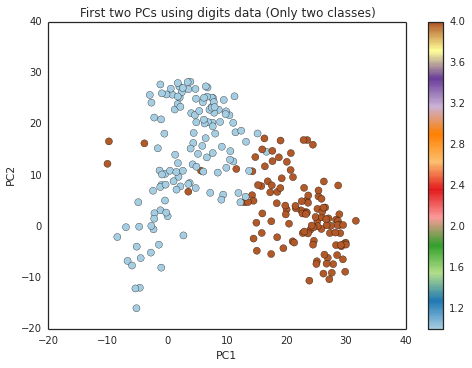

In [49]:
### Your code here ###

ind = np.logical_or(Y_train==4, Y_train==1)

plt.scatter(X_2d[ind,0], X_2d[ind,1], c=Y_train[ind], s = 50, cmap=plt.cm.Paired)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two PCs using digits data (Only two classes)')
plt.show()

Give a brief interpretation of the scatter plot. Which classes look like hard to distinguish? Do both feature dimensions contribute to the class separability? 



** Your answer here: **

In the scatter plot for the classes 4 and 1 shown above, the classes separate quite well, but not completely. The decision boundary would run nearly orthogonal to the x-axis, which is an indicator, that the second dimension plottet on the y axis is not contributing much to the class seperability. 

#### Problem 3(c) 

Write a **ten-fold cross validation** to estimate the optimal value for $k$ for the digits data set. *However*, this time we are interested in the influence of the number of dimensions we project the data down as well. 

Extend the cross validation as done for the iris data set, to optimize $k$ for different dimensional projections of the data. Create a boxplot showing test scores for the optimal $k$ for each $d$-dimensional subspace with $d$ ranging from one to ten. The plot should have the scores on the y-axis and the different dimensions $d$ on the x-axis. You can use your favorite plot function for the boxplots. [Seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/index.html) is worth having a look at though. It is a great library for statistical visualization and of course also comes with a [`boxplot`](http://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html) function that has simple means for changing the labels on the x-axis.

Possible solution A:
---------------------
Split the test data to get multiple test values. This is what I thought the sklearn.cross_val_score function would do for some reason. If somebody comes up with the clever idea to bootstrap the test set I would let that count as well. The main part just is to have multiple estimates of the test performance.

In [50]:
def computeTestScores(test_x, test_y, clf, cv):
    kFolds = sklearn.cross_validation.KFold(test_x.shape[0], n_folds=cv)

    scores = []
    for _, test_index in kFolds:
        test_data = test_x[test_index]
        test_labels = test_y[test_index]
        scores.append(sklearn.metrics.accuracy_score(test_labels, clf.predict(test_data)))
    return scores

In [51]:
### Your cross validation and evaluation code here ###

# use cross validation to find the optimal value for k
k = np.arange(20)+1
parameters = {'n_neighbors': k}
knn = sklearn.neighbors.KNeighborsClassifier()
clf = sklearn.grid_search.GridSearchCV(knn, parameters, cv=10)
all_scores = []
all_k = []
all_d = [1,2,3,4,5,6,7,8,9,10]

for d in all_d:
    print d
    svd = sklearn.decomposition.TruncatedSVD(n_components=d)
    if d<64:
        X_d = svd.fit_transform(X_train_centered)
        X_d_test = svd.transform(X_test_centered)
    else:
        X_d = X_train
        X_d_test = X_test        
        
    clf.fit(X_d, Y_train)   

    all_scores.append(computeTestScores(test_x=X_d_test, test_y=Y_test, clf=clf, cv=10))
    all_k.append(clf.best_params_['n_neighbors'])

1
2
3
4
5
6
7
8
9
10


Really clean solution B:
-------------------------

Do nested k-fold cross validation, with the parameter estimated on an inner k-fold cross validation, and the test score estimated on the outer k-fold cross validation.

In [52]:
# use cross validation to find the optimal value for k
k = np.arange(20)+1
parameters = {'n_neighbors': k}
knn = sklearn.neighbors.KNeighborsClassifier()
clf = sklearn.grid_search.GridSearchCV(knn, parameters, cv=10)
all_scores = []
all_k = []
all_d = [1,2,3,4,5,6,7,8,9,10]
kFolds = sklearn.cross_validation.KFold(X.shape[0], n_folds=10)

for d in all_d:
    print d
    svd = sklearn.decomposition.TruncatedSVD(n_components=d)
    #get the data for this iteration of the outer cross validation loop
    scores = []
    for train_index, test_index in kFolds:
        train_data, test_data = X[train_index], X[test_index]
        train_labels, test_labels = Y[train_index], Y[test_index]  
        
        if d<64:
            data_mean = np.mean(train_data, axis=0)
            train_data_centered = train_data - data_mean
            test_data_centered = test_data - data_mean
            X_d = svd.fit_transform(train_data_centered)
            X_d_test = svd.transform(test_data_centered)
        else:
            X_d = train_data
            X_d_test = test_data        
        
        clf.fit(X_d, train_labels)   
        scores.append(sklearn.metrics.accuracy_score(test_labels, clf.predict(X_d_test)))
        
    all_scores.append(scores)
    all_k.append(clf.best_params_['n_neighbors'])

1
2
3
4
5
6
7
8
9
10


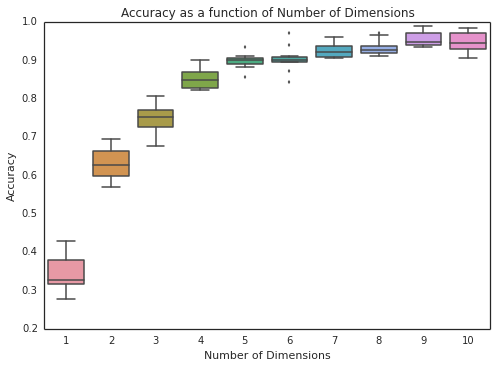

In [53]:
### Your boxplot code here ### 

all_s = np.asarray(all_scores) 
sns.boxplot(all_s.T,names = [np.str(dd) for dd in all_d])
plt.ylabel("Accuracy")
plt.xlabel("Number of Dimensions")
plt.title('Accuracy as a function of Number of Dimensions')
plt.show()

Write a short interpretation of the generated plot, answering the following questions:

* What trend do you see in the plot for increasing dimensions?

* Why do you think this is happening?

** Your answer here: **

The accuracy gets better with increasing dimensions. We have enough data points that the curse of dimensionality does not harm our predictions here and the additional dimensions add to the class separability. There are two factors influencing this. One is that we retain more information of the original signal if we reduce the dimensionality of the data less. The other factor is that the higher dimensional space provides more room between data points and thus more flexibility for the classifier. 

#### Problem 3(d) 

**For AC209 Students**: Change the boxplot we generated above to also show the optimal value for $k$ chosen by the cross validation grid search. 

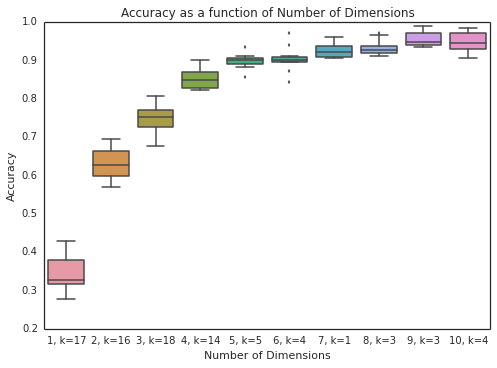

In [54]:
### Your code here ### 
all_s = np.asarray(all_scores) 
sns.boxplot(all_s.T,names = [np.str(dd) + ", k=" + np.str(kk) for dd, kk in zip(all_d, all_k)])
plt.ylabel("Accuracy")
plt.xlabel("Number of Dimensions")
plt.title('Accuracy as a function of Number of Dimensions')
plt.show()

Write a short interpretation answering the following questions:

* Which trend do you observe for the optimal value of $k$?

* Why do you think this is happening?

** Your answer here: **

The optimized value of $k$ becomes smaller if we use a higher dimensional space. We have seen an image in the lecture where the classification of KNN for a new data point changed with the value chosen for $k$. The image also showed that the radius of the sphere around the new data point becomes larger if $k$ is larger, because a larger search radius is needed to find a higher number of points. In the higher dimensional spaces the points are more scattered (curse of dimensionality). Thus the search radius for high values of $k$ becomes so large that the $k$ nearest neighbors start to include points from the other classes.

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

If we use a higher dimensional space, we know the points are more scattered (curse of dimensionality), thus causing the search radius for $k$ to become so large that we start to include points from other classes. 

---

# Submission Instructions

To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code.  Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. *If we cannot access your work because these directions are not followed correctly, we will not grade your work.*
